In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
data1 = pd.read_excel("CW_Data.xlsx")
display(data1)


,Index,Gender,Programme,Grade,Total,MCQ,Q1,Q2,Q3,Q4,Q5
0,1,1,3,3,45.0,21,8,4,2,10.0,0
1,2,2,3,3,43.0,21,4,2,8,8.0,0
2,3,1,4,2,26.0,24,0,0,2,0.0,0
3,4,2,1,3,30.0,24,4,0,0,0.0,2
4,5,1,2,3,27.0,21,0,2,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
614,615,2,1,2,55.0,33,6,4,4,8.0,0
615,616,2,4,2,41.0,27,6,4,4,0.0,0
616,617,2,1,2,73.0,36,8,8,11,10.0,0
617,618,2,1,2,77.0,42,8,8,6,10.0,3


In [12]:
#GMM

G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


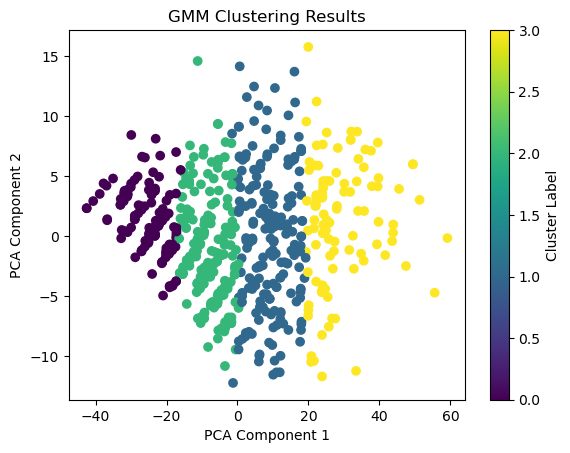

Silhouette Score: 0.34345552077143054
Calinski-Harabasz Score: 806.7078399410389
Davies-Bouldin Score: 0.9253753587752904


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# 假设 data1 是已加载的数据集
data = data1.drop(columns=['Index'])

# 提取特征
features = data[['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]

# 构建和训练GMM模型
gmm = GaussianMixture(n_components=4, covariance_type='spherical', random_state=42)
gmm.fit(features)
gmm_labels = gmm.predict(features)

# 可视化聚类结果（使用PCA降维）
pca = PCA(n_components=2)
data0 = pca.fit_transform(features)
plt.scatter(data0[:, 0], data0[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 聚类质量评估（在完整的特征集上进行评估）
silhouette = silhouette_score(features, gmm_labels)
calinski_harabasz = calinski_harabasz_score(features, gmm_labels)
davies_bouldin = davies_bouldin_score(features, gmm_labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)


G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

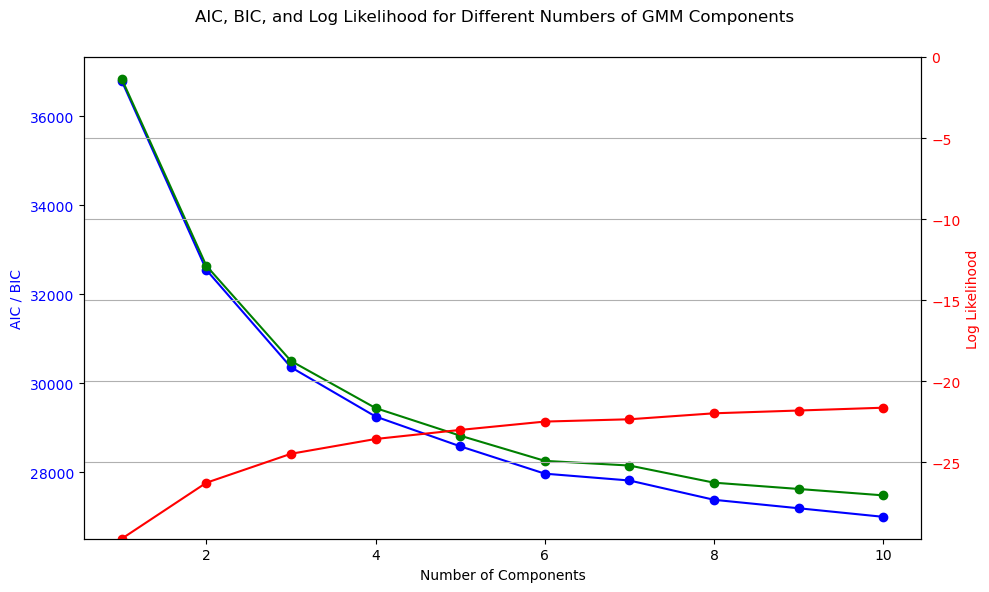

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# 假设 data1 是已加载的数据集
data = data1.drop(columns=['Index'])

# 提取特征
features = data[['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]

# 初始化列表以存储结果
n_components_range = range(1, 11)
aic_values = []
bic_values = []
log_likelihood_values = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='spherical', random_state=42)
    gmm.fit(features)
    
    # 计算AIC, BIC, 和 log-likelihood
    aic_values.append(gmm.aic(features))
    bic_values.append(gmm.bic(features))
    log_likelihood_values.append(gmm.lower_bound_)

# 绘制AIC, BIC, 和 log-likelihood 的折线图
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制AIC和BIC的线条
ax1.plot(n_components_range, aic_values, label='AIC', marker='o', color='blue')
ax1.plot(n_components_range, bic_values, label='BIC', marker='o', color='green')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('AIC / BIC', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 添加右边y轴用于显示对数似然值
ax2 = ax1.twinx()
ax2.plot(n_components_range, log_likelihood_values, label='Log Likelihood', marker='o', color='red')
ax2.set_ylabel('Log Likelihood', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 调整y轴范围使得负数对数似然值也可见
ax2.set_ylim(min(log_likelihood_values), 0)

fig.tight_layout()
fig.suptitle('AIC, BIC, and Log Likelihood for Different Numbers of GMM Components')
fig.subplots_adjust(top=0.9)

plt.grid(True)
plt.show()


In [14]:
#轮廓系数：轮廓系数衡量了聚类的紧密度和分离度。它的值介于-1到1之间，越接近1表示聚类的紧密度和分离度越高，越接近-1表示聚类的质量较差。
#Calinski-Harabasz指数：该指数通过计算聚类内部的离散程度和聚类之间的离散程度的比值来评估聚类的分离度。较高的值表示更好的聚类效果。
#Davies-Bouldin指数：该指数通过衡量聚类内部的紧密度和聚类之间的分离度的比值来评估聚类的紧密度和分离度。较低的值表示更好的聚类效果。

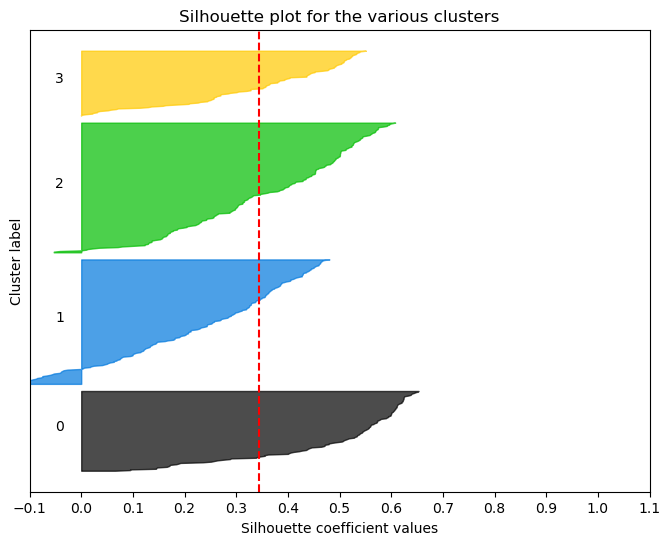

In [15]:
from sklearn.metrics import silhouette_samples

# 轮廓分析
sample_silhouette_values = silhouette_samples(features, gmm_labels)

# 绘制轮廓系数分布图
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(len(set(gmm_labels))):
    ith_cluster_silhouette_values = sample_silhouette_values[gmm_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / len(set(gmm_labels)))
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

plt.title("Silhouette plot for the various clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

# 竖直线表示平均轮廓系数
plt.axvline(x=silhouette, color="red", linestyle="--")

# 设定x轴的范围和标签
plt.xlim(-0.1, 1)
plt.xticks(np.arange(-0.1, 1.1, 0.1))
plt.yticks([])  
plt.show()


G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


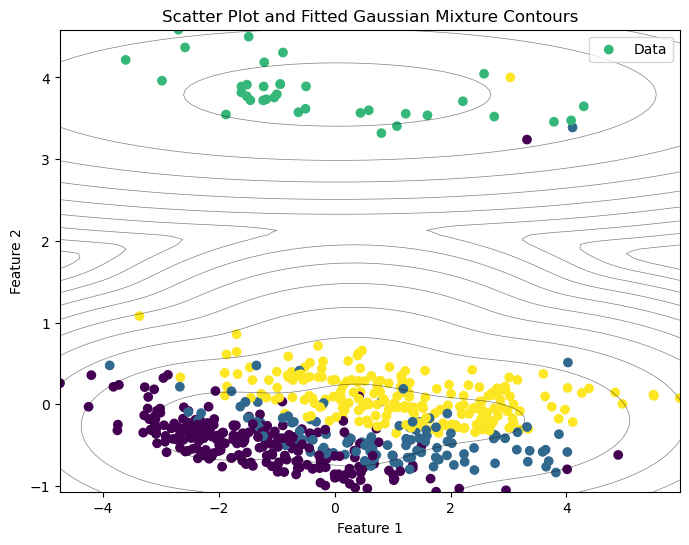

In [16]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
os.environ["OMP_NUM_THREADS"] = "3"

data0 = data1.drop(columns=['Index'])
data = scaler.fit_transform(data0)
data = pd.DataFrame(data, columns=data0.columns)  # 将 NumPy 数组转换回 DataFrame

features = data.iloc[:, 1:]
pca = PCA(n_components=2)
Y1 = pca.fit_transform(features) 

import numpy as np
import matplotlib.pyplot as plt

# 1. 构建GMM模型
gmm = GaussianMixture(n_components=4,covariance_type='diag', random_state=42)
GMModel = gmm.fit(Y1)

# 2. 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(Y1[:, 0], Y1[:, 1], c=data.iloc[:, 1], cmap='viridis', label='Data')

# 3. 绘制GMM模型拟合的等高线图
x = np.linspace(min(Y1[:, 0]), max(Y1[:, 0]), 100)
y = np.linspace(min(Y1[:, 1]), max(Y1[:, 1]), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z, levels=10, linewidths=0.5, colors='black', alpha=0.5)

plt.title('Scatter Plot and Fitted Gaussian Mixture Contours')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


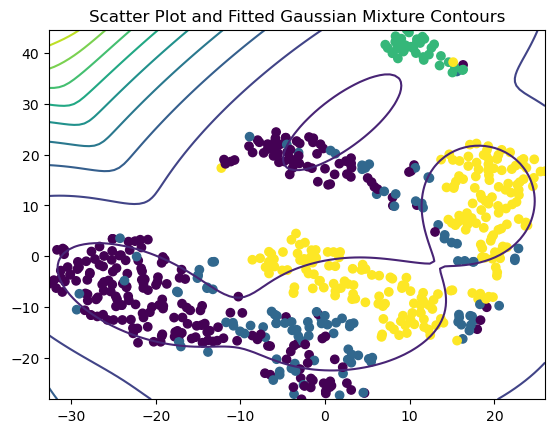

In [17]:
# 筛选数据
import seaborn as sns
from sklearn.manifold import TSNE

# 对数据进行预处理，例如处理缺失值或标准化
from sklearn.preprocessing import StandardScaler

# 创建一个标准化器
scaler = StandardScaler()

# 标准化处理
data_scaled = scaler.fit_transform(data)

# 将标准化后的数据转换为 DataFrame
data_scaled_df = pd.DataFrame(data_scaled)

# 应用 t-SNE 算法进行降维
tsne = TSNE()
Y1 = tsne.fit_transform(data_scaled_df)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 拟合高斯混合模型
gmm = GaussianMixture(n_components=4)
gmm.fit(Y1)

# 绘制散点图
plt.scatter(Y1[:, 0], Y1[:, 1], c=data.iloc[:, 1], cmap='viridis')

# 绘制等高线图
x = np.linspace(Y1[:, 0].min(), Y1[:, 0].max(), 100)
y = np.linspace(Y1[:, 1].min(), Y1[:, 1].max(), 100)
X, Y = np.meshgrid(x, y)
Z = -gmm.score_samples(np.array([X.ravel(), Y.ravel()]).T)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z, levels=10)

# 添加标题和关闭图例
plt.title('Scatter Plot and Fitted Gaussian Mixture Contours')
plt.legend().remove()
plt.show()


In [18]:
#K-MEANS

G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


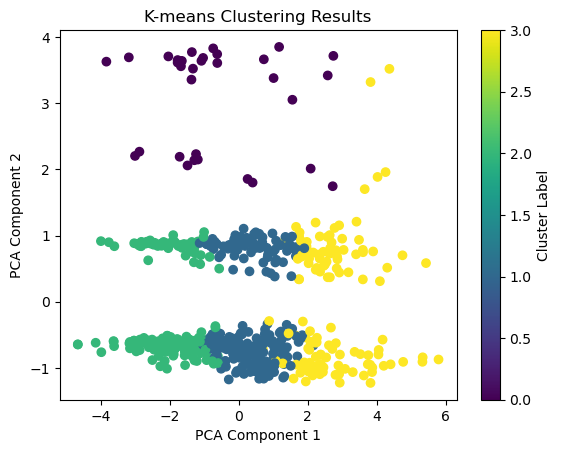

Silhouette Score: 0.3699186129082469
Calinski-Harabasz Score: 510.69717268521595
Davies-Bouldin Score: 0.8704878565751742


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

# 1. 导入数据
data = data1.drop(columns=['Index'])

# 2. 选择特征
features = data[['Gender', 'Grade', 'Total', 'MCQ', 'Q1', 'Q2','Q3', 'Q4', 'Q5']]

# 3. 数据预处理
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 4. 构建 k-means 模型
kmeans = KMeans(n_clusters=4, random_state=42)  # 设置簇的数量为4，根据需要调整
kmeans.fit(features_scaled)
cluster_labels = kmeans.labels_

# 5. 可视化聚类结果（使用PCA降维）
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# 6. 可视化聚类结果
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 7. 计算聚类质量指标
silhouette = silhouette_score(features_pca, cluster_labels)
calinski_harabasz = calinski_harabasz_score(features_pca, cluster_labels)
davies_bouldin = davies_bouldin_score(features_pca, cluster_labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)


In [21]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# 5. 获取聚类结果及相关数据
# 聚类标签
data['Cluster_Labels'] = cluster_labels

# 聚类中心
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features.columns)

# 每个样本到聚类中心的距离
distances = kmeans.transform(features_scaled)
distances_df = pd.DataFrame(distances, columns=[f'Distance_to_Center_{i+1}' for i in range(len(cluster_centers))])

# 合并数据
clustered_data = pd.concat([data, distances_df], axis=1)

# 打印结果
print("\nCluster Centers:\n", cluster_centers_df)
print("\nDistances to Cluster Centers:\n", distances_df)
print("\nClustered Data:\n", clustered_data)

#Cluster Centers (聚类中心):
#聚类中心是每个聚类的中心点，表示该聚类的平均特征值。这些值反映了每个聚类的特征分布情况，可以帮助你理解每个聚类所代表的学生群体的特征。

#Distances to Cluster Centers (每个样本到聚类中心的距离):
#这是每个样本到每个聚类中心的距离，用来衡量样本与每个聚类的相似度。距离越小表示样本与聚类中心越接近，越大表示样本与聚类中心越远。这些距离可以帮助你理解样本与聚类中心的相似程度，以及聚类的紧密度。

#Clustered Data (聚类后的数据):
#聚类后的数据是原始数据与聚类结果的结合体，包含了每个样本的原始特征以及聚类标签和距离信息。这些数据可以帮助你进一步分析不同聚类的特征分布情况，以及理解每个聚类所代表的学生群体。


Cluster Centers:
      Gender    Grade      Total        MCQ        Q1        Q2         Q3  \
0  1.333333  3.00000  69.030303  37.363636  6.818182  3.878788  11.727273   
1  1.652000  2.00000  60.248000  32.244000  7.104000  3.248000  11.336000   
2  1.714976  2.00000  79.038647  41.956522  7.570048  5.864734  12.917874   
3  1.550388  2.03876  40.418605  26.558140  4.341085  1.627907   5.930233   

         Q4        Q5  
0  7.545455  1.696970  
1  5.668000  0.612000  
2  8.338164  2.400966  
3  1.713178  0.232558  

Distances to Cluster Centers:
      Distance_to_Center_1  Distance_to_Center_2  Distance_to_Center_3  \
0                3.697785              5.347039              6.323593   
1                3.518365              4.918724              6.132271   
2                7.130343              5.244418              7.071588   
3                5.146681              6.069573              7.376154   
4                5.507961              6.473026              7.929344   
..   

G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_

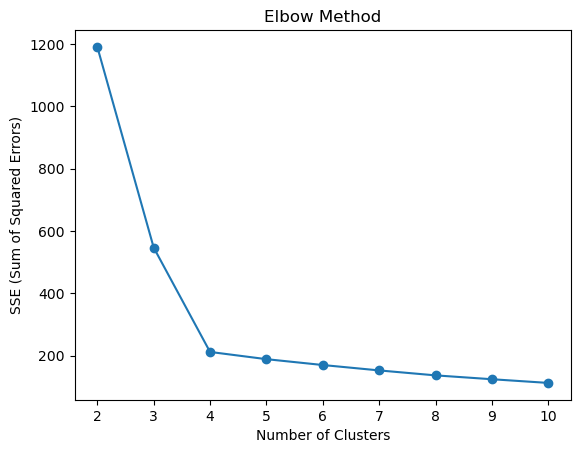

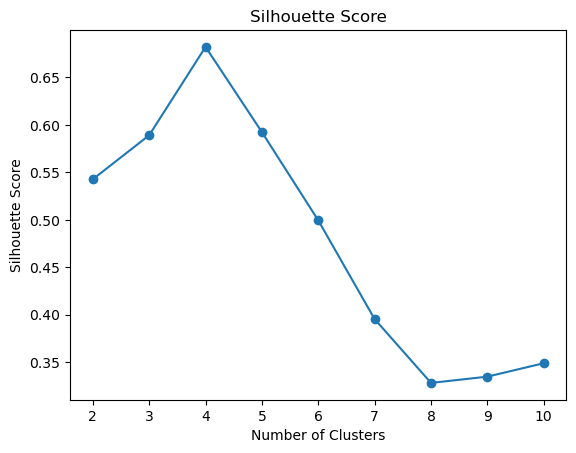

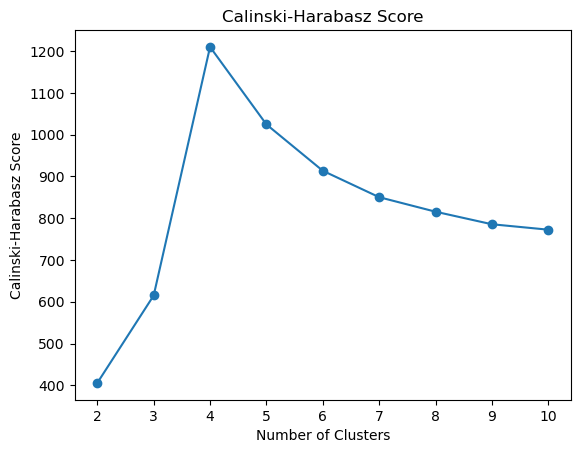

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.datasets import make_blobs

# 生成示例数据
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 计算不同簇数量下的 KMeans 模型
k_values = range(2, 11)  # 尝试不同的簇数量
sse = []  # 用于存储损失函数值
silhouette_scores = []  # 用于存储轮廓系数
ch_scores = []  # 用于存储 Calinski-Harabasz 指数

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # 损失函数值
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))  # 轮廓系数
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))  # Calinski-Harabasz 指数

# 绘制损失函数与簇数量的关系图（肘部法则）
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method')
plt.show()

# 绘制轮廓系数与簇数量的关系图
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

# 绘制 Calinski-Harabasz 指数与簇数量的关系图
plt.plot(k_values, ch_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score')
plt.show()


In [ ]:
#hierarchical clustering

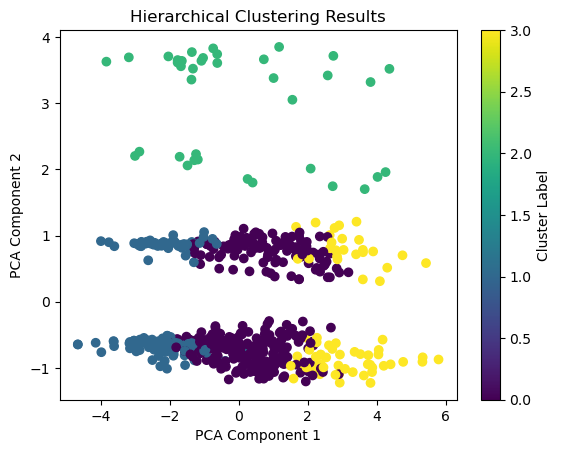

Silhouette Score: 0.28592057831122286
Calinski-Harabasz Score: 344.96307770579784
Davies-Bouldin Score: 0.9601683255929624
     Cluster_Label  Programme
0                2          3
1                2          3
2                3          4
3                2          1
4                2          2
..             ...        ...
614              0          1
615              3          4
616              0          1
617              1          1
618              3          1

[619 rows x 2 columns]


In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# 4. 构建层次聚类模型
agg_clustering = AgglomerativeClustering(n_clusters=4)  # 设置簇的数量为4，根据需要调整
cluster_labels = agg_clustering.fit_predict(features_scaled)

# 5. 可视化聚类结果（使用PCA降维）
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 6. 计算聚类质量指标
silhouette = silhouette_score(features_pca, cluster_labels)
calinski_harabasz = calinski_harabasz_score(features_pca, cluster_labels)
davies_bouldin = davies_bouldin_score(features_pca, cluster_labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)

# 7. 输出聚类结果和其他相关信息
result_df = pd.DataFrame({'Cluster_Label': cluster_labels, 'Programme': data['Programme']})
print(result_df)

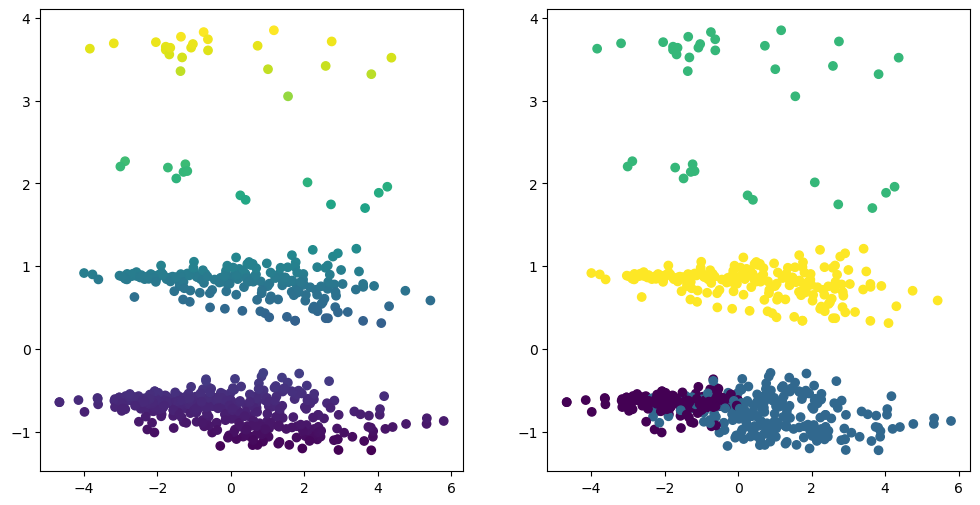

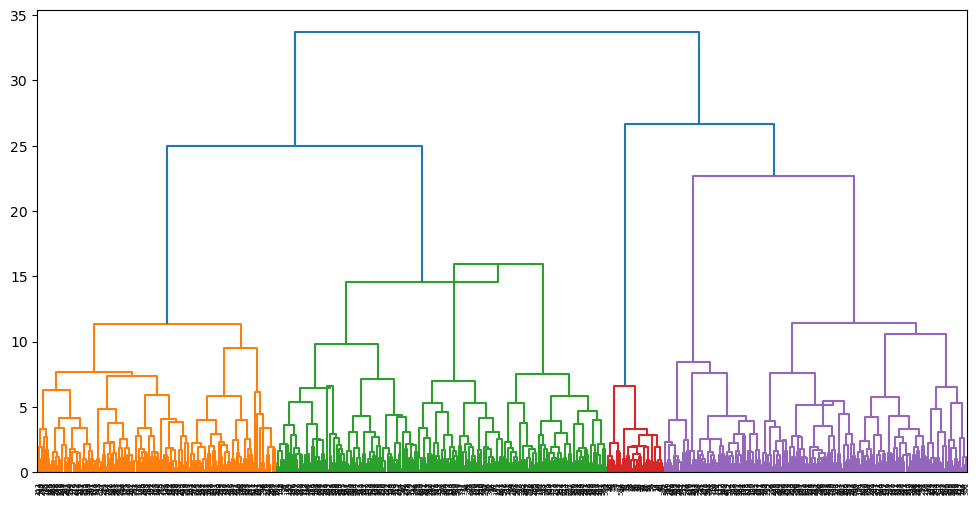

Silhouette Score: 0.28592057831122286
Calinski-Harabasz Score: 344.96307770579784
Davies-Bouldin Score: 0.9601683255929624


In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import numpy as np

# 计算样本间的距离
distanceCluster = pdist(Y1)

# 进行层次聚类并生成聚类结果
Z = linkage(distanceCluster, method='centroid')  # 使用“ward”方法进行层次聚类
idx = fcluster(Z, t=4, criterion='maxclust')  # 将聚类结果限制在4个簇

# 初始化混淆矩阵和结果数组
conMat = np.zeros((4, 4))
resultIdx = np.zeros(idx.shape)
idxLib = [1, 2, 3, 4]

# 计算混淆矩阵
for i in range(4):
    for j in range(4):
        conMat[j, i] = np.sum(idx[features_pca[:, 1]==i+1] == j+1)

# 找到最佳的类别与聚类结果的映射关系
for i in range(3):
    tempC = np.argmax(conMat[0, :] - np.sum(conMat[1:, :], axis=0))
    resultIdx[idx==i+1] = idxLib[tempC]
    idxLib.pop(tempC)
    conMat = np.delete(conMat, tempC, axis=1)

# 将剩余的聚类结果映射到最后一个类别
resultIdx[idx==4] = idxLib[0]

# 绘制比较结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=features_pca[:, 1], cmap='viridis')
plt.subplot(1, 2, 2)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=resultIdx, cmap='viridis')
plt.show()

# 绘制树状图
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.show()

# 6. 计算聚类质量指标
silhouette = silhouette_score(features_pca, cluster_labels)
calinski_harabasz = calinski_harabasz_score(features_pca, cluster_labels)
davies_bouldin = davies_bouldin_score(features_pca, cluster_labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)

G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


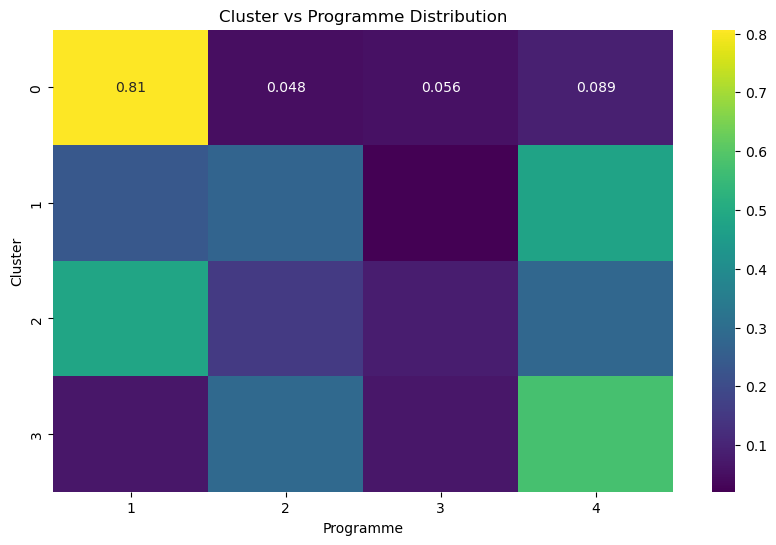

G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
G:\AIvoice\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
G:\AIvoice\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


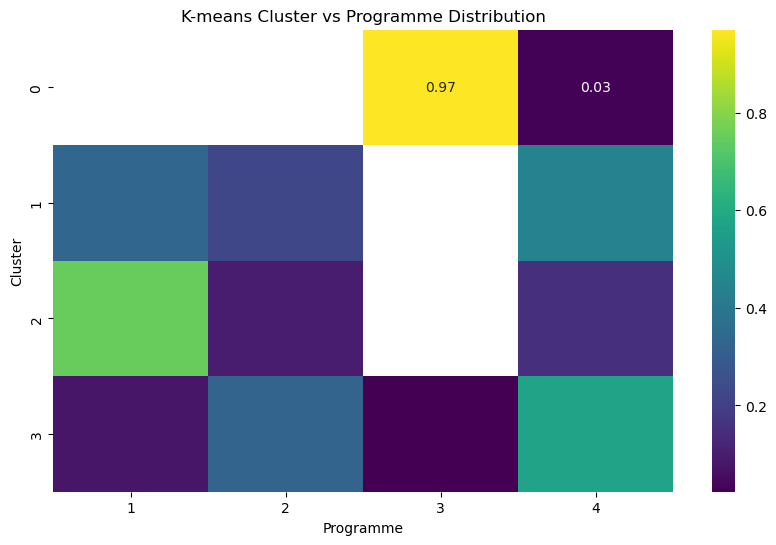

G:\AIvoice\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


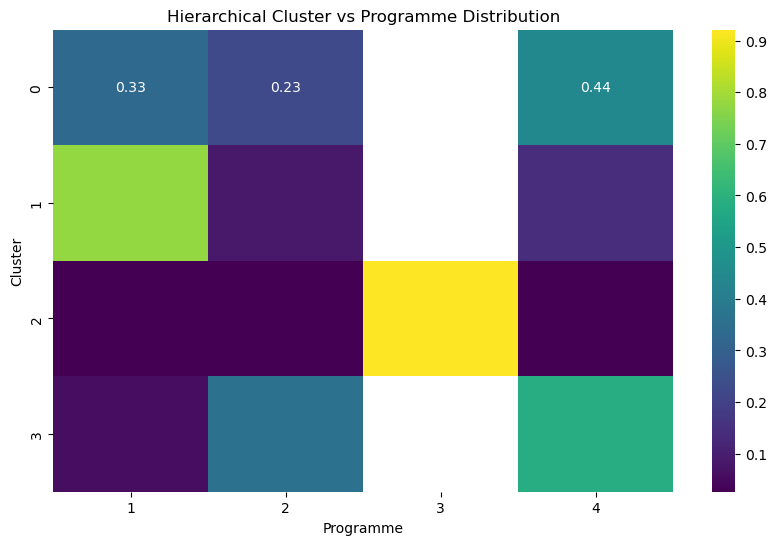

In [25]:
# 1. 使用 GMM 模型聚类
gmm = GaussianMixture(n_components=4, covariance_type='spherical', random_state=42)
gmm.fit(features)
gmm_labels = gmm.predict(features)

# 将聚类结果与项目信息合并
clustered_data = pd.concat([data1['Programme'], pd.DataFrame(gmm_labels, columns=['Cluster_Labels'])], axis=1)

# 分析每个聚类中学生来自不同项目的比例
cluster_programme_counts = clustered_data.groupby('Cluster_Labels')['Programme'].value_counts(normalize=True).unstack()

# 可视化比较聚类与项目的关联性
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_programme_counts, annot=True, cmap='viridis')
plt.title('Cluster vs Programme Distribution')
plt.xlabel('Programme')
plt.ylabel('Cluster')
plt.show()

# 2. 使用 K-means 聚类
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_scaled)
kmeans_labels = kmeans.labels_

# 将聚类结果与项目信息合并
clustered_data_kmeans = pd.concat([data1['Programme'], pd.DataFrame(kmeans_labels, columns=['Cluster_Labels'])], axis=1)

# 分析每个聚类中学生来自不同项目的比例
cluster_programme_counts_kmeans = clustered_data_kmeans.groupby('Cluster_Labels')['Programme'].value_counts(normalize=True).unstack()

# 可视化比较聚类与项目的关联性
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_programme_counts_kmeans, annot=True, cmap='viridis')
plt.title('K-means Cluster vs Programme Distribution')
plt.xlabel('Programme')
plt.ylabel('Cluster')
plt.show()

# 3. 使用层次聚类
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(features_scaled)

# 将聚类结果与项目信息合并
clustered_data_agg = pd.concat([data1['Programme'], pd.DataFrame(agg_labels, columns=['Cluster_Labels'])], axis=1)

# 分析每个聚类中学生来自不同项目的比例
cluster_programme_counts_agg = clustered_data_agg.groupby('Cluster_Labels')['Programme'].value_counts(normalize=True).unstack()

# 可视化比较聚类与项目的关联性
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_programme_counts_agg, annot=True, cmap='viridis')
plt.title('Hierarchical Cluster vs Programme Distribution')
plt.xlabel('Programme')
plt.ylabel('Cluster')
plt.show()
